# ANALISIS EXPLORATORIO DE DATOS DE DIFERENTES CRIPTOMONEDAS

## Introducción

Se pretende realizar un estudio sobre los movimientos que realizan las criptomonedas en periodos de tiempo acotados, con ello pretendemos entender mejor el tipo de variaciones que realizan y ver que correlación hay entre ellas. Se plantearan una serie de hipotesis donde se podrá ver su funcionamiento, para ello se realizaran comparaciones entre monedas.


**Hipotesis**

1. ShibaInu ¿Es la criptomoneda que mas se aproxima a los movimientos de bitcoin?
2. ¿Es Bitcoin un valor estacionario?
3. ¿Realiza Bitcoin un movimiento predecible?
4. ¿Es cardano la criptomoneda que mas ha crecido en el año 2021?

**Requerimiento de Datos**

Para responder a estas hipotesis se ha recopilado una serie de DataSets de algunas de las criptomonedas más tendentes desde su inicio hasta la actualidad. Se realizará el estudio de Bitcoin, Ethereum, Dogecoin, Cardano y ShibaInu.


Se utilizaran las siguientes librerias para el tratamiento de los datos:

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima


Para poder disponer de los datos se han de cargar los Datasets, para ello se utilizará la funcion *read_csv* de la libreria **Pandas**.

In [3]:
Bitcoin = pd.read_csv('EDA2\Bitcoin.csv')
Cardano = pd.read_csv('EDA2\Cardano.csv')
DogeCoin = pd.read_csv('EDA2\DogeCoin.csv')
Ethereum = pd.read_csv('EDA2\Ethereum.csv')
ShibaInu = pd.read_csv('EDA2\SHIBAINU.csv')

Cada Dataset consta de diferentes datos, los cuales se utilizarán para realizar el análisis.
Los datos que se muestran en el Dataset son los siguiente:

1. Date(fecha): Muestra la fecha desde su inicio hasta la actualidad

2. Open(Valor de apertura): Muestra cada dia el valor inicial de la moneda

3. High(Valor máximo): Muestra el valor máximo que ha alcanzado en un dia

4. Low(Valor mínimo): Muestra el valor mínimo que ha alcanzado en un dia

5. Close(Valor de cierre): Muestra cada dia el valor final de la moneda

6. Adj Close(valor de cierre ajustado): Valor de cierre teniendo en cuenta factores externos

7. Volume(Volumen): cantidad de monedas que se ha negociado en un dia

In [4]:
Bitcoin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-21,329.542999,329.628998,318.903015,320.842987,320.842987,15207600
1,2014-12-22,321.067993,334.117004,320.424988,331.885986,331.885986,22315100
2,2014-12-23,332.016998,336.286987,329.601990,334.571991,334.571991,16574200
3,2014-12-24,334.385010,334.740997,321.356995,322.533997,322.533997,15092300
4,2014-12-25,322.286011,322.670013,316.958008,319.007996,319.007996,9883640
...,...,...,...,...,...,...,...
2690,2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
2691,2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490
2692,2022-05-05,39695.746094,39789.281250,35856.515625,36575.140625,36575.140625,43106256317
2693,2022-05-06,36573.183594,36624.359375,35482.132813,36040.921875,36040.921875,37795577489


Para que se pueda leer el valor de *Date* como fecha se da formato de tiempo, y se coloca como índice. Para esto se usa la libreria **Datetime** y **Pandas**.


In [5]:
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'], format='%Y-%m-%d')
Bitcoin = Bitcoin.set_index('Date')
Ethereum['Date'] = pd.to_datetime(Ethereum['Date'], format='%Y-%m-%d')
Ethereum = Ethereum.set_index('Date')
Cardano['Date'] = pd.to_datetime(Cardano['Date'], format='%Y-%m-%d')
Cardano = Cardano.set_index('Date')
DogeCoin['Date'] = pd.to_datetime(DogeCoin['Date'], format='%Y-%m-%d')
DogeCoin = DogeCoin.set_index('Date')
ShibaInu['Date'] = pd.to_datetime(ShibaInu['Date'], format='%Y-%m-%d')
ShibaInu = ShibaInu.set_index('Date')

Para el estudio se utilizarán los valores de cierre *Close* y *Date*, para ello se construira un Dateframe usando estas colomnas de cada uno de los DataFrames iniciales, utilizando así una única tabla de valores.

In [6]:
df = pd.DataFrame()
df = pd.merge(left=Bitcoin['Close'],right=Ethereum['Close'], left_on='Date', right_on='Date')
df = pd.merge(left= df, right=Cardano['Close'], left_on='Date', right_on='Date')
df = pd.merge(left= df, right=DogeCoin['Close'], left_on='Date', right_on='Date')
df = pd.merge(left= df, right=ShibaInu['Close'], left_on='Date', right_on='Date')
df


C:\Users\Ivan\AppData\Local\Temp\ipykernel_3036\3067617682.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Close_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(left= df, right=DogeCoin['Close'], left_on='Date', right_on='Date')


,Close_x,Close_y,Close_x,Close_y,Close
Date,,,,,
2020-08-01,11759.592773,385.199707,0.143573,0.003689,0.000000
2020-08-02,11053.614258,370.671722,0.133505,0.003336,0.000000
2020-08-03,11246.348633,386.295166,0.137335,0.003389,0.000000
2020-08-04,11205.892578,389.875488,0.143018,0.003535,0.000000
2020-08-05,11747.022461,401.590576,0.142695,0.003513,0.000000
...,...,...,...,...,...
2022-05-03,37750.453125,2783.476318,0.771145,0.129520,0.000020
2022-05-04,39698.371094,2940.644775,0.896942,0.135809,0.000022
2022-05-05,36575.140625,2749.213135,0.791152,0.128430,0.000020


Posteriormente se renombran las columnas para la identificación de los datos.

In [7]:
df = df.set_axis(['Bitcoin', 'Ethereum', 'Cardano', 'DogeCoin', 'ShibaInu'], axis=1)

Utilizando la función *.describe()* de la librería **Pandas** se puede observa a primera vista como es Bitcoin la criptomoneda que mayor valor ha alcanzado, y ShibaIno la de menor valor.

In [8]:
df.describe()

,Bitcoin,Ethereum,Cardano,DogeCoin,ShibaInu
count,645.000000,645.000000,645.000000,645.000000,645.000000
mean,38399.708954,2263.215749,1.079654,0.144300,0.000013
std,15605.206561,1281.283705,0.734400,0.126175,0.000016
min,10131.516602,321.116302,0.076763,0.002517,0.000000
25%,31676.693359,1130.739380,0.302530,0.008616,0.000000
50%,40538.011719,2455.935059,1.150594,0.140878,0.000007
75%,48960.789063,3226.083984,1.470677,0.233142,0.000024
max,67566.828125,4812.087402,2.968239,0.684777,0.000080


### **1. ShibaInu ¿Es la criptomoneda que mas se aproxima a los movimientos de bitcoin?**

Para responder a esta hipotesis se ha de estudiar la correlación que existe entre todas las monedas estudiadas y Bitcoin.

En primer lugar se representan las dos variables mediante un diagrama de dispersion *(scatterplot)*, para observar la relacion que existe.
Se puede ver una clara relacion lineal entre el precio de Bitcoin y las demás criptomodenas. Para ello se utilizarán los precios de cierre de cada una de ellas, desde el *2020-08-01* hasta la actualidad.

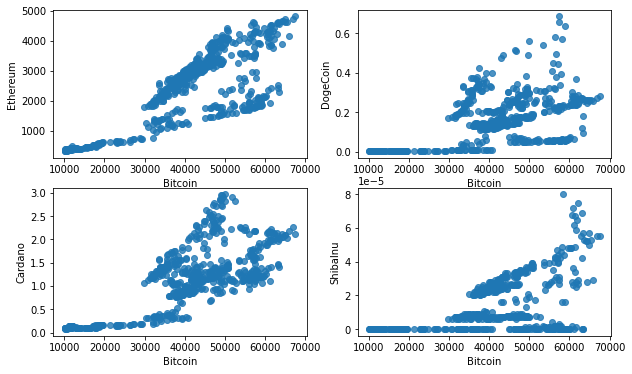

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
axs[0,0].scatter(x=df.Bitcoin, y=df.Ethereum, alpha= 0.8)
axs[0,0].set_xlabel('Bitcoin')
axs[0,0].set_ylabel('Ethereum')

axs[1,0].scatter(x=df.Bitcoin, y=df.Cardano, alpha= 0.8)
axs[1,0].set_xlabel('Bitcoin')
axs[1,0].set_ylabel('Cardano')

axs[0,1].scatter(x=df.Bitcoin, y=df.DogeCoin, alpha= 0.8)
axs[0,1].set_xlabel('Bitcoin')
axs[0,1].set_ylabel('DogeCoin')

axs[1,1].scatter(x=df.Bitcoin, y=df.ShibaInu, alpha= 0.8)
axs[1,1].set_xlabel('Bitcoin')
axs[1,1].set_ylabel('ShibaInu')

plt.show()

Para poder determinar este grado de correlación de una forma mas exacta se debe estudiar el mejor método para su obtención para ello se ha de tener en cuenta la normalidad, la homocedasticidad (varianza constante) y la presencia de *outliers*.

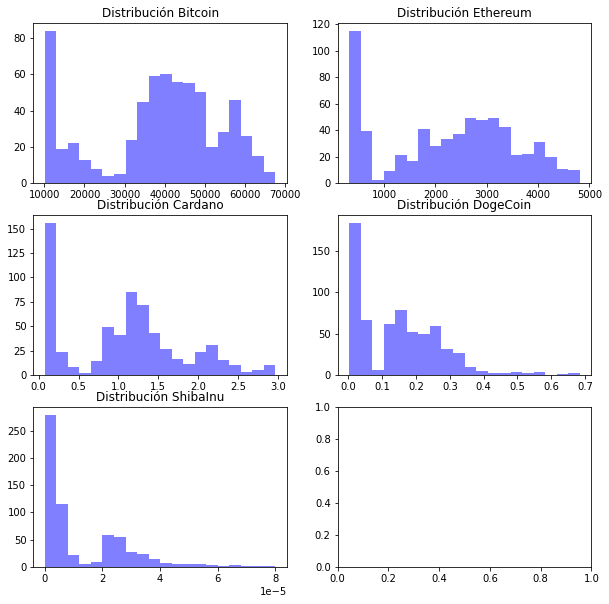

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

axs[0,0].hist(x=df.Bitcoin, bins=20, color="b", alpha=0.5)
axs[0,0].set_title('Distribución Bitcoin')


axs[0,1].hist(x=df.Ethereum, bins=20, color="b", alpha=0.5)
axs[0,1].set_title('Distribución Ethereum')

axs[1,0].hist(x=df.Cardano, bins=20, color="b", alpha=0.5)
axs[1,0].set_title('Distribución Cardano')

axs[1,1].hist(x=df.DogeCoin, bins=20, color="b", alpha=0.5)
axs[1,1].set_title('Distribución DogeCoin')


axs[2,0].hist(x=df.ShibaInu, bins=20, color="b", alpha=0.5)
axs[2,0].set_title('Distribución ShibaInu')


plt.show()

Los histograma no parece tener a simple vista una distribución normal. Se puede ver como usando el grafico Quantile-Quantile, comunmente usado para corroborar la normalidad, se comparan los datos con los quantiles de la distribucion normal. Se puede observar como la distribucion que se dibuja no sigue la distribución normal.

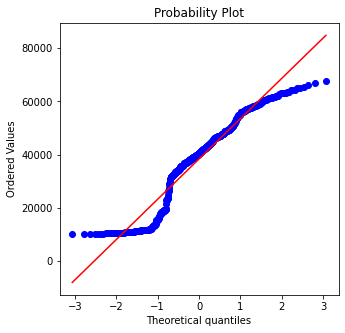

In [11]:
plt.figure(figsize=(5, 5))
ss.probplot(df.Bitcoin, dist='norm', plot = plt)
plt.show()

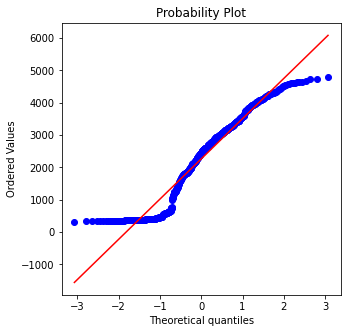

In [12]:
plt.figure(figsize=(5, 5))
ss.probplot(df.Ethereum, dist='norm', plot = plt)
plt.show()

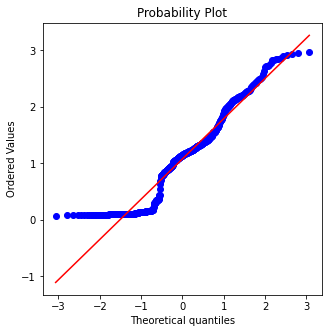

In [13]:
plt.figure(figsize=(5, 5))
ss.probplot(df.Cardano, dist='norm', plot = plt)
plt.show()

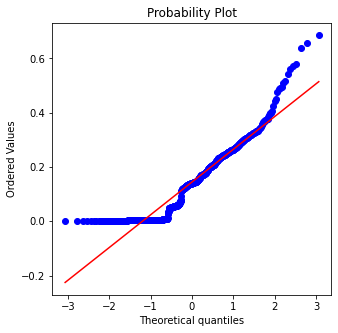

In [14]:
plt.figure(figsize=(5, 5))
ss.probplot(df.DogeCoin, dist='norm', plot = plt)
plt.show()

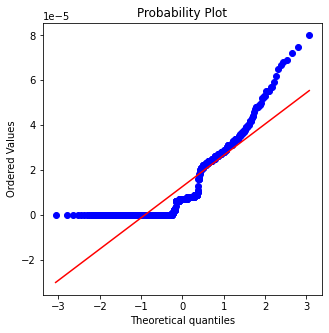

In [15]:
plt.figure(figsize=(5, 5))
ss.probplot(df.ShibaInu, dist='norm', plot = plt)
plt.show()

Una vez obtenido el resultado gráfico se realiza el test estadístico de shaphiro-Wilk para probar la normalidad. En donde si el *p_valor* es menor a 0.05 se rechazará la hipotesis nula.


In [44]:
nombre = ['Bitcoin', 'Ethereum', 'Cardano', 'DogeCoin', 'ShibaInu']

for i in nombre:
    shapiro_test = ss.shapiro(df[i])
    print(f"Shapiro Bitcoin: {shapiro_test}")

Shapiro Bitcoin: ShapiroResult(statistic=0.9316969513893127, pvalue=1.4255534062043333e-16)
Shapiro Bitcoin: ShapiroResult(statistic=0.9373588562011719, pvalue=7.991797150200502e-16)
Shapiro Bitcoin: ShapiroResult(statistic=0.9343352913856506, pvalue=3.1416081436747576e-16)
Shapiro Bitcoin: ShapiroResult(statistic=0.9057596325874329, pvalue=1.5940315826113245e-19)
Shapiro Bitcoin: ShapiroResult(statistic=0.7993336915969849, pvalue=1.7321503845097753e-27)


Se observa así como ningun *p_valor* es mayor a 0.05 por lo tanto se rechaza la hipotesis nula, es decir, los valores NO siguen una distribución normal. Se utilizará por tanto el método Spearman para definir las correlación exitentes. 

In [48]:
nombre = ['Ethereum', 'Cardano', 'DogeCoin', 'ShibaInu']
for i in nombre:
    print(f'Correlación Spearman Bitcoin - {i}: ', df.Bitcoin.corr(df[i], method='spearman'))


Correlación Spearman Bitcoin - Ethereum:  0.7780579295738304
Correlación Spearman Bitcoin - Cardano:  0.7590170334537945
Correlación Spearman Bitcoin - DogeCoin:  0.6359767888136371
Correlación Spearman Bitcoin - ShibaInu:  0.521433089957608


Mediante la observación del resultado que determina el metodo *spearman* se concluye que es Ethereum la moneda que más se asemeja a los movimientos de Bitcoin. Se puede ver también representada esta correlación en el siguiente gráfico de calor.

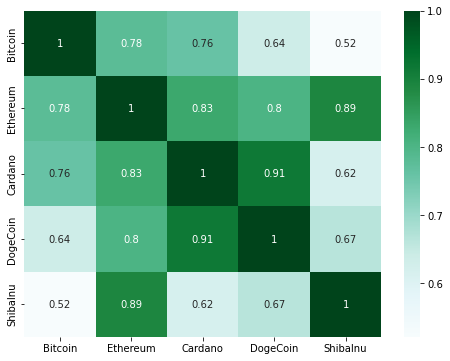

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='BuGn')
plt.show()

Suavizando la gráfica 80 periodos con la funcion ***rolling*** se observa dicha correlación.

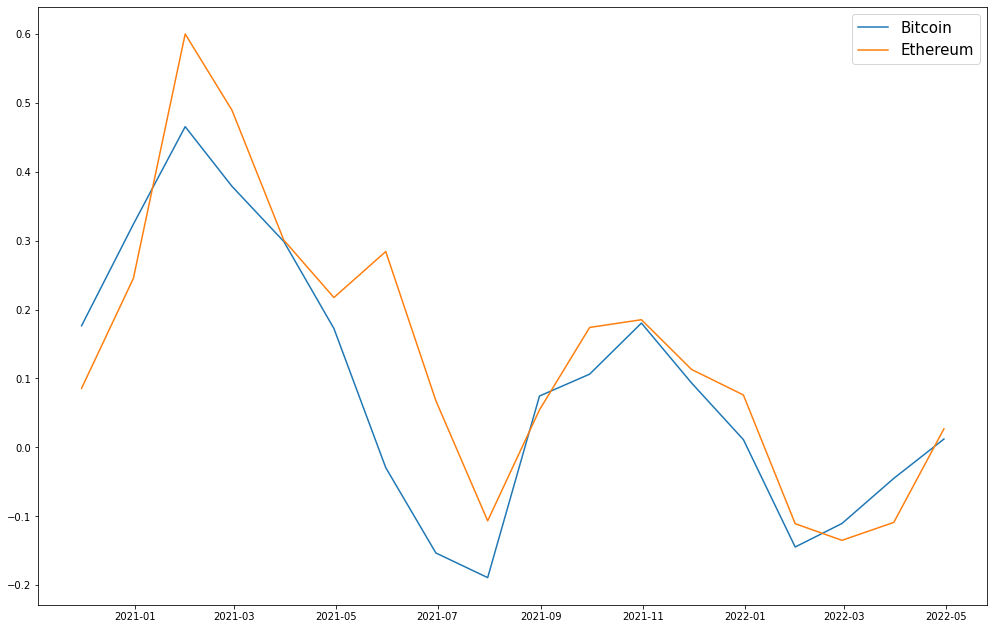

In [183]:
df['Bitcoin_norm'] = df.Bitcoin/df.Bitcoin.max()
df['Ethereum_norm'] = df.Ethereum/df.Ethereum.max()
plt.figure(figsize=(17,11))
plt.plot(df.Bitcoin_norm.rolling(80).mean().asfreq('M').pct_change(), label='Bitcoin')
plt.plot(df.Ethereum_norm.rolling(80).mean().asfreq('M').pct_change(), label='Ethereum')
plt.legend(fontsize=15)
plt.show()

### **2. ¿Es Bitcoin un valor estacionario? ¿Realiza Bitcoin un movimiento predecible?**



Una serie estacionaria es quella en la que....(Idea para empezar este aparatado en la memoria)
Para probar la estacionariedad de Bitcoin se usará el test de Dickey-Fuller. Si el *p valor* obtenido es menor a 0.05 se confirmará la estacionariedad, en caso contrario se trabajará con una serie de tiempo no estacionaria.

El resustado obtenido de *p valor* es mayor a 0.05, se puede confirmar que Bitcoin tiene un movimiento ***No estacionario***.

In [149]:
## con el p-valor demostramos que no es una serie estacionaria pues p-valor > 0.05
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.Bitcoin)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.846444
p-value: 0.357659


Mediante el uso del metodo *auto_arima* se obtine la mejor configuración en función del valor del *AIC* para aplicar el modelo *ARIMA*.

In [150]:
stepwise_fit = auto_arima(df.Bitcoin, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = True)          
  
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.79 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=12716.273, Time=1.16 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=11373.845, Time=4.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=12169.909, Time=2.55 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=12719.535, Time=0.15 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=11602.855, Time=0.23 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=11331.264, Time=7.30 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=8.70 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.66 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=12712.424, Time=2.23 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=11333.227, Time=7.95 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=11333.226, Time=7.76 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=12158.825, Time=4.26 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=8.06 sec
 ARIMA(1,0,0)(2,1,0)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  645
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -5660.614
Date:                            Wed, 25 May 2022   AIC                          11329.227
Time:                                    00:25:15   BIC                          11347.029
Sample:                                         0   HQIC                         11336.141
                                            - 645                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9605      0.008    120.936      0.000       0.945       0.976
ar.S.L12      -0.7207      0.031    -22.937      0.000      -0.782      -0.659
ar.S.L24      -0.2660      0.035     -7.610      0.000      -0.335      -0.198
sigma2      3.391e+06   1.33e+05     25.577      0.000    3.13e+06    3.65e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               156.76
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                            -0.09
Prob(H) (two-sided):                  0.37   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Una vez se tiene la configuración recomendada la aplicamos a nuestro caso y se dibuja la predicción con el movimiento real que tuvo la criptomoneda. Se puede ver como predice de manera fiel el movimiento, pero esto no sería correcto pues se toma para predecir el precio de Bitcoin.

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

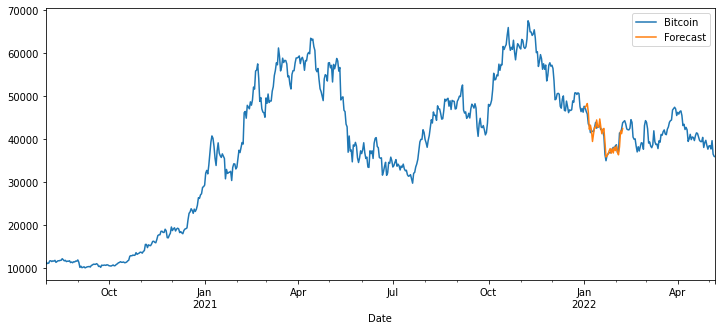

In [182]:
model = SARIMAX(df.Bitcoin, 
                order = (1, 0, 0), 
                seasonal_order =(2, 1, 0, 12))
result = model.fit()
  
prediccion = result.predict(start = len(df[:'2022-01-01'].Bitcoin), 
                          end = (len(df[:'2022-01-01'].Bitcoin) + 3 * 12), 
                          typ = 'levels').rename('Forecast')
  
plt.plot(df.Bitcoin, label='Bitcoin')
plt.plot(prediccion, label='Predicción')
plt.legend(fontsize=12)
plt.show()

Para obtener un resultado mas fiel a la realidad se realiza el modelo *Arima* en el rendimiento diario de la criptomoneda. Para ello se usa la función *pct_change()* para hayar el cambio porcentual a traves del tiempo. Comprobando así como **No** es predecible el movimiento. Esto es debido a qué la grafica resultante presenta un patrón muy similar a la grafica de ruido siento esta imposible de predecir por su alta aleatoriedad.

c:\Users\Ivan\miniconda3\envs\the_bridge_22\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


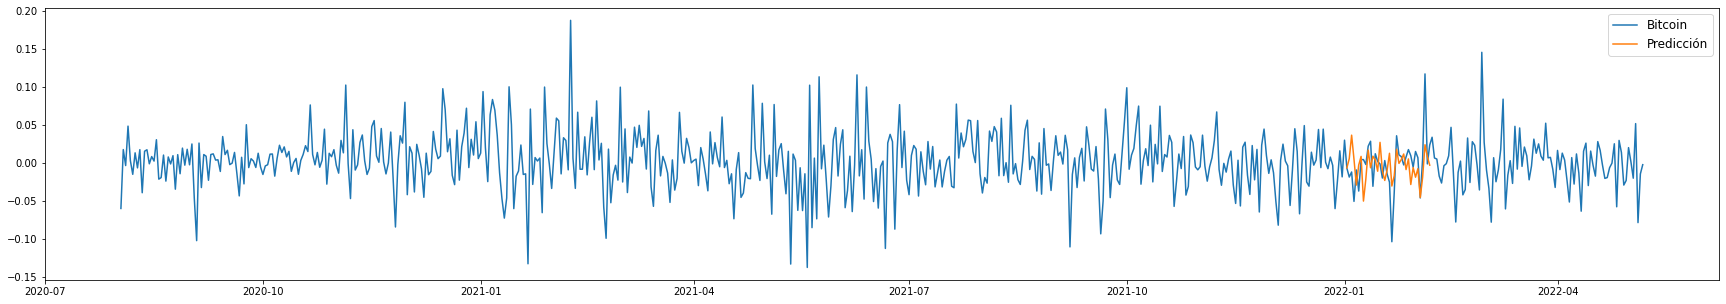

In [181]:
plt.figure(figsize=(30,5))
model = SARIMAX(df.Bitcoin.pct_change(), 
                order = (1, 0, 0), 
                seasonal_order =(2, 1, 0, 12))
result = model.fit()
  
prediccion = result.predict(start = len(df[:'2022-01-01'].Bitcoin), 
                          end = (len(df[:'2022-01-01'].Bitcoin)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')

plt.plot(df.Bitcoin.pct_change(), label='Bitcoin')
plt.plot(prediccion, label='Predicción')
plt.legend(fontsize=12)
plt.show()


### **4. ¿Es cardano la criptomoneda que mas ha crecido en el año 2021?**

Para responder a pregunta se deberá primero normalizar todos los precios para dejarlos en una misma escala. Para ello se divide el valor actual entre el maximo y dejando los valores en una escala de *0* a *1*.

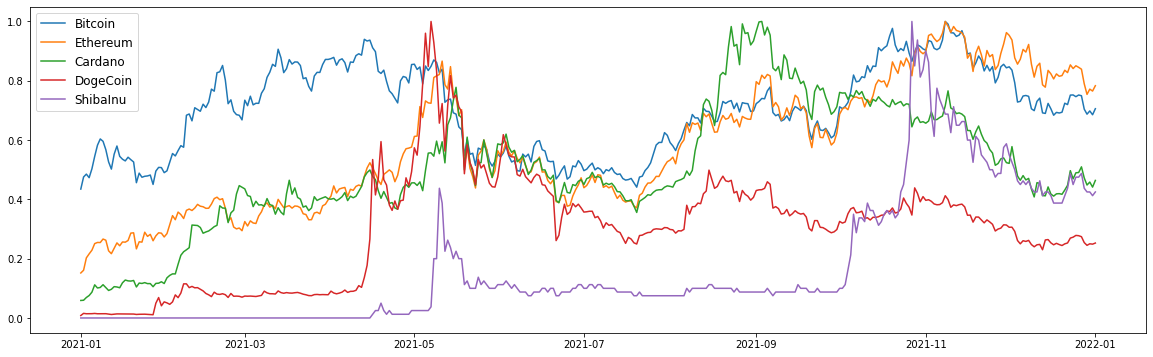

In [105]:
plt.figure(figsize=(20,6))
nombre = ['Bitcoin','Ethereum', 'Cardano', 'DogeCoin', 'ShibaInu']
for i in nombre:
    plt.plot(df['2021-01-01':'2022-01-01'][i]/df['2021-01-01':'2022-01-01'][i].max(), label = i)
plt.legend(fontsize=12)
plt.show()

Se dibuja la grafica con valores mensuales y obteniendo el cambio porcentual en los datos.

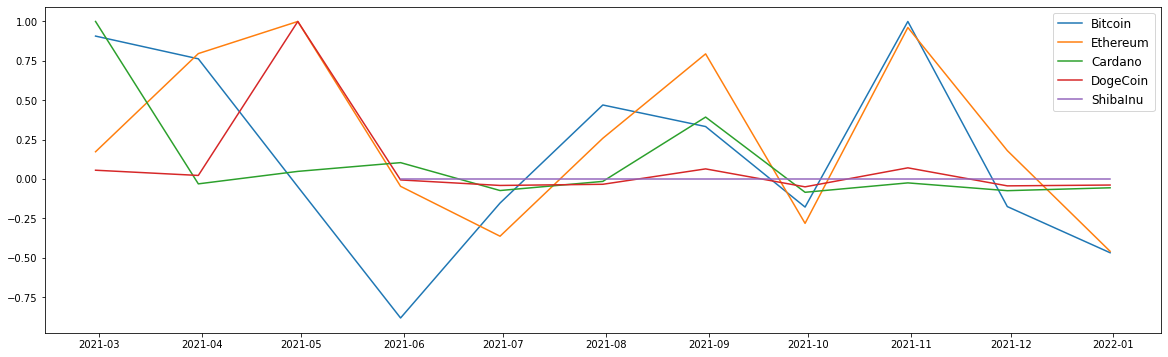

In [133]:
plt.figure(figsize=(20,6))
nombre = ['Bitcoin','Ethereum', 'Cardano', 'DogeCoin', 'ShibaInu']
for i in nombre:
    plt.plot((df['2021-01-01':'2022-01-01'][i].asfreq('M').pct_change()/df['2021-01-01':'2022-01-01'][i].asfreq('M').pct_change().max()), label = i)
plt.legend(fontsize=12)
plt.show()


Se puede observar como ninguna criptomoneda ha tenido una movimiento positivo de un año a otro, es decir todas han perdido valor. Siendo ShibaInu la que mas ha perdido seguida de DogeCoin y Ethereum.

In [184]:
nombre = ['Bitcoin', 'Ethereum', 'Cardano', 'DogeCoin', 'ShibaInu']
for i in nombre:
    print(df['2021-01-01':'2022-01-01'][i].asfreq('M').pct_change()*100)

Date
2021-01-31          NaN
2021-02-28    36.308751
2021-03-31    30.531111
2021-04-30    -1.983502
2021-05-31   -35.354560
2021-06-30    -6.139417
2021-07-31    18.793385
2021-08-31    13.310110
2021-09-30    -7.157155
2021-10-31    40.026729
2021-11-30    -7.034580
2021-12-31   -18.768355
Freq: M, Name: Bitcoin, dtype: float64
Date
2021-01-31          NaN
2021-02-28     7.685460
2021-03-31    35.472863
2021-04-30    44.561190
2021-05-31    -2.100879
2021-06-30   -16.221237
2021-07-31    11.503930
2021-08-31    35.388344
2021-09-30   -12.582625
2021-10-31    42.855858
2021-11-30     8.008368
2021-12-31   -20.486894
Freq: M, Name: Ethereum, dtype: float64
Date
2021-01-31           NaN
2021-02-28    279.259665
2021-03-31     -8.775980
2021-04-30     13.340300
2021-05-31     28.860903
2021-06-30    -20.616854
2021-07-31     -4.418376
2021-08-31    109.663514
2021-09-30    -23.734136
2021-10-31     -7.066890
2021-11-30    -20.871123
2021-12-31    -15.736930
Freq: M, Name: Cardano, dtype:

## **Conclusiones**